# Parcial 1 Aprendizaje Automático y Análisis de Datos
- Autor: Josue Peña Atencio - 8935601
- Fecha: Febrero 28 2020

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100
pd.options.display.max_columns = 35

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/dis.data"
data = pd.read_csv(url, header=None, true_values='t', false_values='f', na_values='?')

data.columns = ['Age', 'Sex', 'On_thyroxine', 'Q_on_thyroxine', 'On_antithyroid_med', 'Sick',
                'Pregnant', 'Thyroid_surgery', 'I131_treatment', 'Q_hypothyroid',
                'Q_hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH_measured',
                'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured',
                'FTI', 'TBG_measured', 'TBG', 'Source', 'V'] # V for veredict

# Al final de cada línea, hay información extra sobre el id de cada paciente.
# Esto imposibilita que hayan sólo 2 atributos de salida, ademas de no ser relevante para este contexto.
data['V'] = data['V'].apply(lambda x: x.split('.')[0])

data

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
0,41.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.30,True,2.5,True,125.0,True,1.14,True,109.0,False,NaN,SVHC,negative
1,23.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.10,True,2.0,True,102.0,False,NaN,False,NaN,False,NaN,other,negative
2,46.0,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109.0,True,0.91,True,120.0,False,NaN,other,negative
3,70.0,F,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175.0,False,NaN,False,NaN,False,NaN,other,negative
4,70.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61.0,True,0.87,True,70.0,False,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2.70,False,NaN,True,155.0,True,1.05,True,148.0,False,NaN,SVI,negative
2796,73.0,M,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,0.7,True,63.0,True,0.88,True,72.0,False,NaN,other,negative
2797,75.0,M,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,False,NaN,True,147.0,True,0.80,True,183.0,False,NaN,other,negative
2798,60.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.40,False,NaN,True,100.0,True,0.83,True,121.0,False,NaN,other,negative


# 1. Conocer el conjunto de datos y realizar un plan para ajustarlos

In [2]:
# Número de registros y atributos
data.shape

(2800, 30)

In [3]:
# Tipo de los atributos
data.dtypes

Age                   float64
Sex                    object
On_thyroxine             bool
Q_on_thyroxine           bool
On_antithyroid_med       bool
Sick                     bool
Pregnant                 bool
Thyroid_surgery          bool
I131_treatment           bool
Q_hypothyroid            bool
Q_hyperthyroid           bool
Lithium                  bool
Goitre                   bool
Tumor                    bool
Hypopituitary            bool
Psych                    bool
TSH_measured             bool
TSH                   float64
T3_measured              bool
T3                    float64
TT4_measured             bool
TT4                   float64
T4U_measured             bool
T4U                   float64
FTI_measured             bool
FTI                   float64
TBG_measured             bool
TBG                   float64
Source                 object
V                      object
dtype: object

In [4]:
# Medidas de centralidad para atributos numéricos
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,TBG
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


In [5]:
# Medidas de centralidad para atributos categóricos y numéricos
data.mode()

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
0,59.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.2,True,2.0,True,101.0,True,0.99,True,100.0,False,NaN,other,negative
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x7f20c7b72ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f20c7b80208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f20c7b727b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f20c7b80898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f20c7b80be0>],
 'means': []}

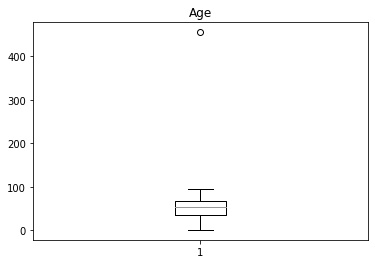

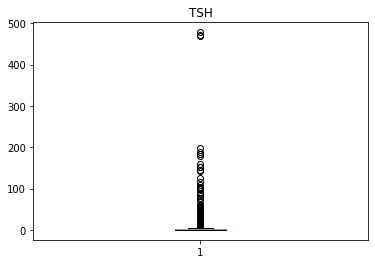

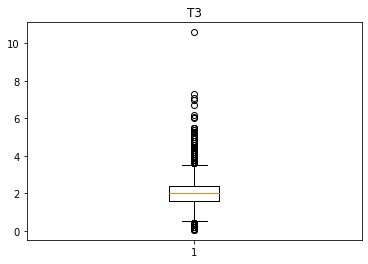

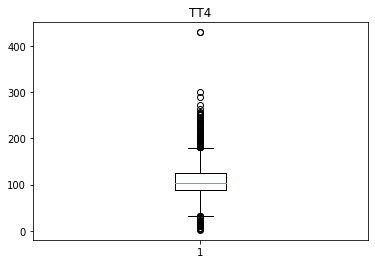

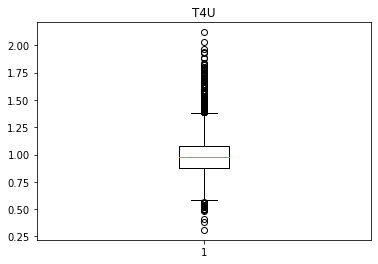

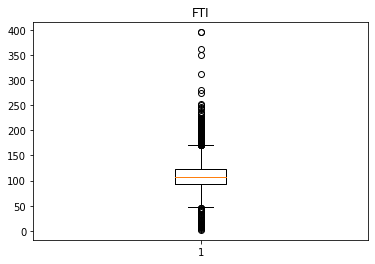

In [6]:
# Existen datos atípicos?

fig1, bp1 = plt.subplots()
bp1.set_title('Age')
bp1.boxplot(data['Age'].dropna())

fig1, bp2 = plt.subplots()
bp2.set_title('TSH')
bp2.boxplot(data['TSH'].dropna())

fig1, bp3 = plt.subplots()
bp3.set_title('T3')
bp3.boxplot(data['T3'].dropna())

fig1, bp4 = plt.subplots()
bp4.set_title('TT4')
bp4.boxplot(data['TT4'].dropna())

fig1, bp5 = plt.subplots()
bp5.set_title('T4U')
bp5.boxplot(data['T4U'].dropna())

fig6, bp6 = plt.subplots()
bp6.set_title('FTI')
bp6.boxplot(data['FTI'].dropna())

In [7]:
# Registros con 'Age' > 400
data[data['Age'] > 400]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
1364,455.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.1,True,2.0,True,118.0,True,1.13,True,104.0,False,NaN,SVI,negative


In [8]:
# Registros con 'TSH' > 400
data[data['TSH'] > 400]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
1165,18.0,F,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,478.0,False,NaN,True,45.0,True,1.30,True,34.0,False,NaN,other,negative
2507,2.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,472.0,True,1.7,True,34.0,True,1.17,True,29.0,False,NaN,STMW,negative
2772,25.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,468.0,True,0.7,True,21.0,True,1.10,True,19.0,False,NaN,other,negative


In [9]:
# Registros con 'T3 > 10
data[data['T3'] > 10]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
1671,77.0,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.015,True,10.6,True,226.0,True,0.65,True,349.0,False,NaN,other,negative


In [10]:
# Registros con 'FTI' > 300
data[data['FTI'] > 300]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
456,33.0,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0.015,True,5.0,True,244.0,True,0.67,True,362.0,False,NaN,other,negative
542,15.0,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.015,True,6.0,True,250.0,True,0.80,True,312.0,False,NaN,other,negative
743,41.0,F,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0.150,True,7.3,True,430.0,True,1.09,True,395.0,False,NaN,STMW,negative
1415,41.0,F,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,0.200,False,NaN,True,430.0,True,1.09,True,395.0,False,NaN,STMW,negative
1671,77.0,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.015,True,10.6,True,226.0,True,0.65,True,349.0,False,NaN,other,negative


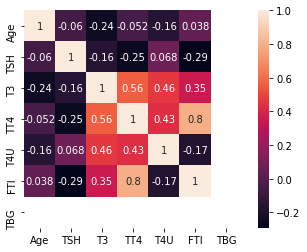

In [11]:
# Correlación entre los datos
sns.heatmap(data[['Age','TSH','T3','TT4','T4U','FTI','TBG']].corr(), square=True, annot=True)

In [12]:
# Registros faltantes por cada atributo
data.isnull().sum()

Age                      1
Sex                    110
On_thyroxine             0
Q_on_thyroxine           0
On_antithyroid_med       0
Sick                     0
Pregnant                 0
Thyroid_surgery          0
I131_treatment           0
Q_hypothyroid            0
Q_hyperthyroid           0
Lithium                  0
Goitre                   0
Tumor                    0
Hypopituitary            0
Psych                    0
TSH_measured             0
TSH                    284
T3_measured              0
T3                     585
TT4_measured             0
TT4                    184
T4U_measured             0
T4U                    297
FTI_measured             0
FTI                    295
TBG_measured             0
TBG                   2800
Source                   0
V                        0
dtype: int64

In [13]:
# Cantidad máxima de atributos faltantes en un mismo registro
max(data.isnull().sum(axis=1))

7

In [14]:
# Cantidad de registros que tienen 5 o más atributos faltantes
data.isna().sum(axis=1)[data.isna().sum(axis=1) > 4].size

181

In [15]:
# Cantidad máxima de valores nulos por registro en clase 'discordant'
max(data[data['V']=='discordant'].isna().sum(axis=1))

3

In [16]:
# Cantidad de registros con atributos binarios == True
for col in data:
    if data[col].dtype == 'bool':
        print(col,data[data[col] == True].shape[0])

On_thyroxine 330
Q_on_thyroxine 40
On_antithyroid_med 34
Sick 110
Pregnant 41
Thyroid_surgery 39
I131_treatment 48
Q_hypothyroid 163
Q_hyperthyroid 173
Lithium 14
Goitre 25
Tumor 71
Hypopituitary 1
Psych 135
TSH_measured 2516
T3_measured 2215
TT4_measured 2616
T4U_measured 2503
FTI_measured 2505
TBG_measured 0


In [17]:
# Registros con 'Lithium' == True
data[data['Lithium'] == True]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
119,35.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,3.90,False,NaN,True,83.0,True,0.85,True,97.0,False,NaN,SVHC,negative
525,23.0,F,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,7.90,True,2.2,True,104.0,True,1.07,True,97.0,False,NaN,SVHC,negative
692,46.0,F,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,1.70,True,1.1,True,94.0,True,0.91,True,103.0,False,NaN,SVI,negative
928,45.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,1.60,True,1.8,True,89.0,True,0.80,True,112.0,False,NaN,SVHC,negative
942,58.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,3.00,False,NaN,True,115.0,True,1.07,True,107.0,False,NaN,SVI,negative
1065,47.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,2.20,True,2.0,True,108.0,True,1.08,True,100.0,False,NaN,SVHC,negative
1263,37.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,0.64,True,2.1,True,92.0,True,0.99,True,93.0,False,NaN,other,negative
1360,54.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,2.90,True,2.5,True,74.0,True,0.99,True,75.0,False,NaN,SVHC,negative
1673,37.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,4.40,True,2.6,True,108.0,True,1.12,True,96.0,False,NaN,other,negative
1901,63.0,F,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,2.80,True,2.0,True,93.0,True,1.04,True,89.0,False,NaN,SVHC,negative


In [18]:
# Registros con 'Goitre' == True
data[data['Goitre'] == True]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
42,61.0,F,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.99,True,1.5,True,63.0,True,0.56,True,113.0,False,NaN,SVI,negative
149,38.0,F,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.88,True,1.6,True,108.0,True,0.85,True,127.0,False,NaN,SVI,negative
196,71.0,F,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.02,False,NaN,True,127.0,True,1.06,True,119.0,False,NaN,other,negative
233,44.0,M,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,0.10,True,0.6,True,61.0,True,0.86,True,71.0,False,NaN,SVI,negative
336,67.0,M,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,False,NaN,True,101.0,True,1.01,True,100.0,False,NaN,other,negative
458,55.0,F,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.29,False,NaN,True,81.0,True,0.70,True,116.0,False,NaN,SVI,negative
594,35.0,M,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.30,True,2.0,True,75.0,True,1.21,True,62.0,False,NaN,SVI,negative
607,61.0,F,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.15,True,2.1,True,97.0,True,1.03,True,95.0,False,NaN,other,negative
658,57.0,M,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,False,NaN,True,88.0,True,0.86,True,102.0,False,NaN,other,negative
702,44.0,M,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0.89,False,NaN,True,40.0,True,0.96,True,42.0,False,NaN,SVI,negative


In [19]:
# Registro con 'Hypopituitary' == True
data[data['Hypopituitary'] == True]

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Source,V
273,21.0,M,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,0.25,True,1.3,True,54.0,True,1.07,True,51.0,False,NaN,SVI,negative


In [20]:
# Cantidad de registros por cada clase o atributo de salida
data['V'].value_counts()

negative      2755
discordant      45
Name: V, dtype: int64

### Plan para ajustar los datos
1. **Eliminar todos los atributos '*_measured'**. Estos sólo indican si su valor medido asociado es nulo o no. Son redundantes (ademas de poner ser inconsistentes, eg que en un registro 'TSH_measured' sea False pero 'TSH' sea no-nulo, y viceversa)


2. **Eliminar el el atributo 'TBG'**. Todos los valores de esa columna son nulos.


3. **Eliminar el atributo 'source'**. Este sólo indica la fuente referida de los datos.


4. **Eliminar el atributo 'TT4'**. Este tiene niveles muy altos de correlación con los atributos 'FTI' (0.8), 'T4U' (0.43) y 'T3' (0.56). Se escoge este atributo en lugar de 'FTI' ya que éste ultimo sólo tiene correlación alta con 'TT4' y 'T3'.


5. **Eliminar los atributos 'Lithium', 'Goitre' y 'Hypopituitary'**. Son atributos binarios, y la presencia de valores 'True' es muy poca para ser significativa (No más del 2 o 3% de registros cuentan con valores True en alguno de estos atributos). Además y no menos importante, ninguno de los registros pertenece a la clase 'discordant'.


6. **Borrar los registros que tengan más de 2 atributos nulos**. Como los registros de la clase 'discordant' solo tienen a lo sumo 2 atributos nulos (después de hacer la eliminación de atributos), ningún registro que pertenezca a esa clase es borrado.


7. **Reemplazar los atributos booleanos nulos por sus modas**.
8. **Reemplazar los atributos numéricos por sus medianas**.

__Para los pasos 9-12__: Todos los registros atípicos que serán reemplazados no pertenecen a la clase 'discordant', entonces no hay peligro de perder información limitada e importante para esa clase.

9. **Reemplazar el dato atípico de 'Age' > 400 con la moda**.
10. **Reemplazar los datos atípicos de 'TSH' > 400 con el primer valor < 400**.
11. **Reemplazar el dato atípico de 'T3' > 10 con el primer valor < 10**.
12. **Reemplazar los datos atípicos de 'FTI' > 300 con el primer valor < 300**.


13. **Normalizar los atributos TSH, T3, T4U y FTI**.
14. **Convertir los atributos categóricos a escala numérica**.


15. **Hacer balanceo de clases 1:1 con oversampling de la clase minoritaria**, **DESPUÉS** de separar el conjunto de datos en conjunto de entrenamiento y de pruebas. Esto es para prevenir que ocurra overfitting, ya que si se hace antes habrán observaciones exactamente iguales en ambos conjuntos, causando poca generalidad en los datos y métricas de desempeño casi que perfectas.

# 2. Preprocesamiento del conjunto de datos

In [21]:
#1. Eliminar todos los atributos '*_measured'.
data.drop(['TSH_measured'], axis=1, inplace=True)
data.drop(['T3_measured'], axis=1, inplace=True)
data.drop(['TT4_measured'], axis=1, inplace=True)
data.drop(['T4U_measured'], axis=1, inplace=True)
data.drop(['FTI_measured'], axis=1, inplace=True)
data.drop(['TBG_measured'], axis=1, inplace=True)

#2. Eliminar el atributo 'TBG'.
data.drop(['TBG'], axis=1, inplace=True)

#3. Eliminar el atributo 'source'.
data.drop(['Source'], axis=1, inplace=True)

#4. Eliminar el atributo 'TT4'
data.drop(['TT4'], axis=1, inplace=True)

#5 Eliminar los atributos 'Lithium', 'Goitre' y 'Hypopituitary'
data.drop(['Lithium'], axis=1, inplace=True)
data.drop(['Goitre'], axis=1, inplace=True)
data.drop(['Hypopituitary'], axis=1, inplace=True)

In [22]:
# Cantidad máxima de valores nulos por registro en clase 'discordant' luego de eliminar atributos
max(data[data['V']=='discordant'].isna().sum(axis=1))

2

In [23]:
# Cantidad de registros con más de 2 atributos nulos
data.isna().sum(axis=1)[data.isna().sum(axis=1) > 2].size

193

In [24]:
#6. Borrar los registros que tengan más de 2 atributos nulos
data.dropna(axis = 0, thresh = 16, inplace=True)

#7. Reemplazar los atributos nulos por sus modas.
am = data.mode()['Age'][0]
sm = data.mode()['Sex'][0]
values1 = {'Age': am, 'Sex': sm}
data.fillna(value=values1, inplace=True)

#8. Reemplazar los atributos numéricos por sus medianas
tshm = data.median()['TSH']
t3m = data.median()['T3']
t4um = data.median()['T4U']
ftim = data.median()['FTI']
values2 = {'TSH': tshm, 'T3': t3m, 'T4U': t4um, 'FTI': ftim}
data.fillna(value=values2, inplace=True)

In [25]:
#9. Reemplazar el dato atípico de 'Age' > 400 con la moda.
data.loc[data['Age']>400,'Age'] = am

#10. Reemplazar los datos atípicos de 'TSH' > 400 con el primer valor < 400.
data.loc[data['TSH']>400,'TSH'] = data[data['TSH']<400].sort_values(by=['TSH'], ascending=False).iloc[0]['TSH']

#11. Reemplazar el dato atípico de 'T3' > 10 con el primer valor < 10.
data.loc[data['T3']>10,'T3'] = data[data['T3']<10].sort_values(by=['T3'], ascending=False).iloc[0]['T3']

#12. Reemplazar los datos atípicos de 'FTI' > 300 con el primer valor < 300.
data.loc[data['FTI']>300,'FTI'] = data[data['FTI']<300].sort_values(by=['FTI'], ascending=False).iloc[0]['FTI']

In [26]:
#13. Convertir los atributos categóricos a escala numérica

uV = data.V.unique()
VDict = dict(zip(uV, range(len(uV))))
data = data.applymap(lambda s: VDict.get(s) if s in VDict else s)

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

In [27]:
#14. Normalizar los atributos TSH, T3, T4U y FTI.
data['TSH'] = preprocessing.robust_scale(data['TSH'])
data['T3'] = preprocessing.robust_scale(data['T3'])
data['T4U'] = preprocessing.robust_scale(data['T4U'])
data['FTI'] = preprocessing.robust_scale(data['FTI'])

In [28]:
data

,Age,Sex,On_thyroxine,Q_on_thyroxine,On_antithyroid_med,Sick,Pregnant,Thyroid_surgery,I131_treatment,Q_hypothyroid,Q_hyperthyroid,Tumor,Psych,TSH,T3,T4U,FTI,V
0,38,0,0,0,0,0,0,0,0,0,0,0,0,-0.015385,0.833333,0.761905,0.066667,0
1,20,0,0,0,0,0,0,0,0,0,0,0,0,0.415385,0.000000,0.000000,0.000000,0
2,43,1,0,0,0,0,0,0,0,0,0,0,0,-0.107692,0.000000,-0.380952,0.433333,0
3,67,0,1,0,0,0,0,0,0,0,0,0,0,-1.338462,-0.166667,0.000000,0.000000,0
4,67,0,0,0,0,0,0,0,0,0,0,0,0,-0.507692,-1.333333,-0.571429,-1.233333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67,1,0,0,0,0,0,0,0,0,0,0,0,0.200000,0.000000,0.333333,1.366667,0
2796,70,1,0,1,0,0,0,0,0,0,0,0,0,0.000000,-2.166667,-0.523810,-1.166667,0
2797,72,1,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.000000,-0.904762,2.500000,0
2798,57,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,-0.761905,0.466667,0


In [29]:
# Dimensiones del conjunto de datos luego de hacer preprocesamiento
data.shape

(2607, 18)

In [30]:
data['V'].value_counts()

0    2562
1      45
Name: V, dtype: int64

# 3. Separar el conjunto de datos en conjunto de entrenamiento y de prueba

In [31]:
# Separación con base en el conjunto de datos alterno con oversampling
IN_train, IN_test = train_test_split(data, test_size = 0.25, random_state = 123, shuffle=True)

In [32]:
g1 = IN_train.groupby('V')
g2 = IN_test.groupby('V')

In [33]:
#15. Hacer balanceo de clases 1:1 con oversampling de la clase minoritaria.

## Balanceo conjunto de datos de entrenamiento
# Separar clases de datos
major_class = IN_train[data.V==0].copy()
minor_class = IN_train[data.V==1].copy()

# Relizar oversampling
minor_class_upsampled = resample(minor_class, replace=True, n_samples=g1.size().max(), random_state=435)

# Mezclar clase mayoritaria 
IN_train = pd.concat([major_class, minor_class_upsampled])

## Balanceo conjunto de datos de prueba
major_class = IN_test[data.V==0].copy()
minor_class = IN_test[data.V==1].copy()
minor_class_upsampled = resample(minor_class, replace=True, n_samples=g2.size().max(), random_state=435)
IN_test = pd.concat([major_class, minor_class_upsampled])

/home/jozdashh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/jozdashh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jozdashh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/jozdashh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [34]:
IN_train['V'].value_counts()

1    1922
0    1922
Name: V, dtype: int64

In [35]:
IN_test['V'].value_counts()

1    640
0    640
Name: V, dtype: int64

In [36]:
OUT_train, OUT_test = IN_train['V'].copy(), IN_test['V'].copy()
IN_train.drop(['V'], axis=1, inplace=True)
IN_test.drop(['V'], axis=1, inplace=True)

# a. Clasificador por regresión lineal
Para este clasificador, no tiene sentido calcular la matriz de confusión y las métricas de desempeño, ya que los valores predecidos son regresiones (números continuos). Ajustar las predicciones para que caigan en alguna de las dos clases implica agregar una función de activación, lo cual es lo mismo que aplicar el clasificador por regresión logística.


Se podría realizar algún tipo de redondeo para forzar a que cada predicción caiga en alguna de las dos clases, sin embargo tal decisión es más bien poco precisa y los resultados por lo tanto no lo serían tampoco.

In [37]:
reg = LinearRegression().fit(IN_train, OUT_train)
pred1 = reg.predict(IN_test)

In [38]:
pred1

array([ 0.01970471, -0.19468322,  0.4494008 , ...,  0.74216658,
        0.74578939,  0.70658589])

# b. Clasificador por regresión logística

In [39]:
clf = LogisticRegression(max_iter=1000).fit(IN_train, OUT_train)
pred2 = clf.predict(IN_test)

In [40]:
# Matriz de confusión
confusion_matrix(OUT_test, pred2)

array([[552,  88],
       [ 60, 580]])

In [41]:
# Precision
precision_score(OUT_test, pred2)

0.8682634730538922

In [42]:
# Recall
recall_score(OUT_test, pred2)

0.90625

In [43]:
# F1-score
f1_score(OUT_test, pred2)

0.8868501529051986

# c. K-vecinos más cercanos (k=5)

In [44]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(IN_train, OUT_train)
pred3 = neigh.predict(IN_test)

In [45]:
# Matriz de confusión
confusion_matrix(OUT_test, pred3)

array([[617,  23],
       [553,  87]])

In [46]:
# Precision
precision_score(OUT_test, pred3)

0.7909090909090909

In [47]:
# Recall
recall_score(OUT_test, pred3)

0.1359375

In [48]:
# F1-score
f1_score(OUT_test, pred3)

0.23199999999999998

# d. Análisis discriminante lineal

In [49]:
lda = LinearDiscriminantAnalysis().fit(IN_train, OUT_train)
pred4 = neigh.predict(IN_test)

In [50]:
# Matriz de confusión
confusion_matrix(OUT_test, pred4)

array([[617,  23],
       [553,  87]])

In [51]:
# Precision
precision_score(OUT_test, pred4)

0.7909090909090909

In [52]:
# Recall
recall_score(OUT_test, pred4)

0.1359375

In [53]:
# F1-score
f1_score(OUT_test, pred4)

0.23199999999999998

# e. Análisis discriminante cuadrático

In [54]:
qda = QuadraticDiscriminantAnalysis().fit(IN_train, OUT_train)
pred5 = neigh.predict(IN_test)

/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [55]:
# Matriz de confusión
confusion_matrix(OUT_test, pred5)

array([[617,  23],
       [553,  87]])

In [56]:
# Precision
precision_score(OUT_test, pred5)

0.7909090909090909

In [57]:
# Recall
recall_score(OUT_test, pred5)

0.1359375

In [58]:
# F1-score
f1_score(OUT_test, pred5)

0.23199999999999998

# Análisis de resultados

La motivación principal en el diseño del plan de acción fue reducir la dimensionalidad del conjunto de datos, al éste tener tan pocos registros (solo 2800). Esto con el fin de poder sacarle el mejor provecho a esta cantidad reducida de datos. Sin embargo, tal decisión influye en los resultados arrojados por los modelos, especialmente en los más sofisticados.

0: Clase de datos 'negative' o 'negativa'


1: Clase de datos 'discordant' o 'positiva'

### Fortalezas y debilidades con respecto al conjunto de datos

###### Clasificador por regresión logística
- El modelo muestra buen desempeño en sus predicciones para este conjunto de datos: Según la matriz de confusión, clasificó correctamente 580 instancias pertenecientes a la clase positiva, y sólo 60 incorrectamente. Para el caso de la clase negativa, clasificó 552 instancias correctamente y 88 incorrectamente. El modelo es más débil con respecto a la clasificación de las clases negativas como tal, pero más fuerte al clasificar instancias de la clase positiva.


Se elaborará más sobre el desempeño de este modelo en las comparaciones con los otros.



###### K-vecinos más cercanos (k=5), Análisis discriminante lineal, Análisis discriminante cuadrático
Estos tres modelos, extrañamente, generaron todos una matriz de confusión exactamente igual (87 true positives, 617 true nagatives, etc). Como se puede observar, los modelos son más fuertes a la hora de clasificar una instancia en la clase negativa de forma correcta, pero son muy débiles para correctamente clasificar instancias positivas (sólo 87 true positives y 553 false negatives). Es decir, los modelos generan demasiados falsos positivos, lo cual en este contexto de veredictos frente a diagnosticos para enfermedades de la tiroides, pueden ser muy peligrosos.


El factor principal que pudo haber afectado el desempeño de estos modelos un poco más robustos que el regresor lineal logístico es la estrategia utilizada para hacer el balanceo entre clases. Se utilizó oversampling, es decir generar más atributos de la clase minoritaria de forma sintética. Además, en el caso de los atributos de tipo flotante sobre las mediciones hormonales, existen relaciones lineales (y esto se ve reflejado en el heatmap de correlación), lo cual puede ser un problema en el análisis discriminante cuadrático.


Como último factor a considerar es el hecho de la eliminación de los tres atributos binarios Lithium, Goitre y Hypopituitary. Si bien estos sólo eran positivos en registros de la clase mayoritaria (lo cual sugiere que con tal información extra, se podría aumentar el número de true negatives), puede que los modelos hubieran tenido un mejor desempeño dejando tales atributos, con la condicion de tener un conjunto de datos más grande, al cual no se le tenga que hacer tanto oversampling.

### Comparación entre las técnicas
Este conjunto de datos tiene un número de registros limitado, mientras que la cantidad de atributos es muy numerosa (30 sin hacer preprocesamiento). Aún después de borrar 12 atributos, los clasificadores más sofisticados (analisis lineal, cuadrático y vecinos más cercanos) tienen un score de recall o sensitivity muy bajo (0.135), es decir que la probabilidad de que los modelos identifiquen el perfil de un paciente como veredicto 'discordant' entre aquellas personas que tengan tal veredicto realmente es muy poca.


Esto puede deberse al hecho de que entre mayor es la cantidad de dimensiones en un conjunto de datos, se requieren muchos más datos de entrenamiento para minimizar los errores de clasificación.


Por otro lado, estos últimos tres modelos demostraron un desempeño aceptable en cuanto a su capacidad para clasificar correctamente una instancia realmente verdadera como como tal entre todas las clasificadas como verdaderas (precision 0.79). Aunque, esta proporción no es sorprendente sabiendo sobre la poca cantidad de true positives que los modelos generaron.

El F1 score da suficiente información para poder evaluar el desempeño general bajo las dos métricas de precision y recall. El F1 score en los modelos es de sólo ~0.232. En conclusión, para este conjunto de datos, los tres modelos tienen un muy mal desempeño.


A comparación, el clasificador por regresión logistica demuestra un muy buen desempeño a la hora de clasificar correctamente instancias pertenecientes a la clase positiva de 'discordant' entre todas las clasificadas como pertenecientes a tal clase (precision de ~0.868), ademas de tener aún mejor desempeño con respecto a la probabilidad de clasificar una instancia positiva correctamente entre todas las instancias que pertenecen realmente a tal clase (recall de ~0.906).

###### Conclusión: 
El modelo de clasificación por regresión lineal logística tiene el mejor desempeño entre todos los modelos, para este conjunto de datos.